# Visualize Face Clustering Results

## Load Clustering Results

In [1]:
from matplotlib import pyplot as plt
from tqdm import tqdm

import json
import cv2
import os

In [2]:
with open("clustered_results.json", "r") as f:
    cluster_info = json.load(f)
cluster_info.keys(), cluster_info[list(cluster_info.keys())[0]][:3]

(dict_keys(['-1', '0']), [])

## Visualize Results

### Original Video

- [https://www.youtube.com/watch?v=bUQj7Ng7PCs](https://www.youtube.com/watch?v=bUQj7Ng7PCs)

### Clustering Results

In [3]:
def display_results(cluster_id, scenes):
    if not os.path.isdir("./clustered_imgs_by_cid"):
        os.mkdir("./clustered_imgs_by_cid")

    frame_num = sum([len(frame_ids) for frame_ids in scenes])
    rows, cols = int(frame_num/8)+1, 8
    rows = min(rows, 300)
    i = 0
    fig = plt.figure(figsize=(16, rows*2))
    for scene_id, frame_ids in tqdm(enumerate(scenes), total=len(scenes), desc=f"ID-{cluster_id}"):
        for frame_id in frame_ids:
            i += 1
            fig.add_subplot(rows, cols, i)
            img_path = f"clustered_imgs/fid-{cluster_id}-{scene_id}-{frame_id}.jpg"
            img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(img)
            if i == 300:
                break
        
        if i == 300:
            break

    plt.tight_layout()
    plt.savefig(f"./clustered_imgs_by_cid/ID-{cluster_id}.png")
    plt.close()

In [4]:
def show_img(img_path, height_rate=0.5):
    img = cv2.imread(img_path)
    height = int(len(img) * height_rate)
    img = img[:height,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(16, 16))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.tight_layout()
    plt.show()

#### Clustered Images

In [5]:
for cluster_id, scenes in cluster_info.items():
    if cluster_id != "-1":
        display_results(cluster_id, scenes)

ID-0:   7%|▋         | 180/2439 [00:05<01:05, 34.52it/s]


##### Results

- 다른 얼굴이 하나의 Cluster로 형성됨

./clustered_imgs_by_cid/ID-0.png


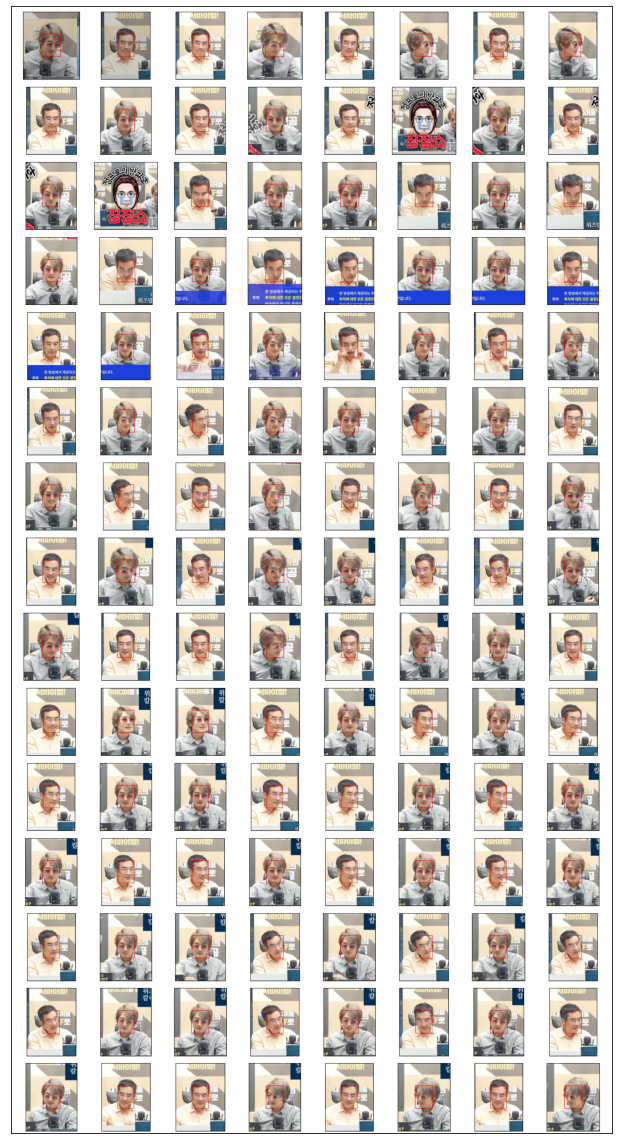

In [6]:
# for cid in range(len(cluster_info)-1):
#     img_path = f"./clustered_imgs_by_cid/ID-{cid}.png"
#     print(img_path)
#     show_img(img_path, height_rate=1.0)

img_path = f"./clustered_imgs_by_cid/ID-0.png"
print(img_path)
show_img(img_path, height_rate=0.05)

#### Not-Clustered Images

In [7]:
for cluster_id, scenes in cluster_info.items():
    if cluster_id == "-1":
        display_results(cluster_id, scenes)

ID--1: 0it [00:00, ?it/s]


##### Results

- Cluster 형상되지 않은 경우가 없음

In [8]:
img_path = "./clustered_imgs_by_cid/ID--1.png"
show_img(img_path, height_rate=0.05)